<a href="https://colab.research.google.com/github/mashahedi/CRM-COURSEWORK/blob/main/Crm_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Package

# Uncomment if needed in Colab:
!pip -q install yfinance yahoofinancials lxml

In [ ]:
# Cell 1 – Question 1(a): Extract S&P 500 table and tickers from Wikipedia

import pandas as pd
import numpy as np
import requests
import yfinance as yf
from yahoofinancials import YahooFinancials

WIKI_URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
START = "2022-01-01"
END   = "2025-01-01"

# Fetch HTML with User-Agent to avoid 403
resp = requests.get(
    WIKI_URL,
    headers={"User-Agent": "Mozilla/5.0"}
)
html = resp.text

# Read all tables in the page
tables = pd.read_html(html)

# S&P 500 constituents table
data_table = tables[1]

# Build tickers list from Symbol column (BRK.B -> BRK-B)
tickers = (
    data_table["Symbol"]
    .astype(str)
    .str.strip()
    .str.replace(".", "-", regex=False)
    .tolist()
)

print("Number of tickers:", len(tickers))
print("First 10 tickers:", tickers[:10])



Number of tickers: 503
First 10 tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


/tmp/ipython-input-1240759162.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


In [ ]:
data_table

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
data_table["Symbol"]

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


In [ ]:
#  Task 1(b): prices with yfinance (primary)

import yfinance as yf
START, END = "2022-01-01", "2025-01-01"

# download adjusted daily close for all tickers in one shot
data_yf = yf.download(
    tickers=tickers,
    start=START,
    end=END,
    interval="1d",
    auto_adjust=True,   # explicit: split/dividend adjusted
    progress=False,
    threads=True
)

# yfinance returns a MultiIndex when multiple tickers are passed
prices_yf = data_yf["Close"] if isinstance(data_yf.columns, pd.MultiIndex) else data_yf[["Close"]]
prices_yf = prices_yf.sort_index()

print("yfinance raw shape:", prices_yf.shape)
prices_yf.head()


ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


yfinance raw shape: (753, 503)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,152.320053,178.270294,116.779297,172.679993,128.996124,42.362530,383.711914,564.369995,165.624527,60.489792,...,34.600174,85.311447,60.062134,55.125229,111.648544,164.029999,127.066299,121.447723,583.900024,224.977814
2022-01-04,147.170700,176.007797,116.555077,170.800003,125.962364,42.914051,380.969849,554.000000,164.128632,61.612446,...,35.043663,85.039291,60.442287,57.198719,112.832947,156.330002,127.745705,122.679771,587.599976,216.412460
2022-01-05,144.649521,171.326004,117.167343,162.250000,125.396446,42.410072,374.260803,514.429993,161.594940,61.131294,...,34.173744,81.890053,61.034588,57.910126,111.295135,143.490005,126.126335,122.275375,558.179993,208.183548
2022-01-06,145.155685,168.465988,116.615456,159.750000,125.377838,42.657307,356.187561,514.119995,162.109161,61.674820,...,34.446671,82.269112,60.557213,59.272209,111.142319,144.660004,127.429276,121.259613,555.159973,209.010284
2022-01-07,141.291229,168.632507,116.313622,166.050003,125.767509,42.856995,349.355896,510.700012,157.855194,62.200504,...,34.404022,82.181648,61.087631,59.758049,110.254028,141.539993,125.968109,120.526031,530.859985,202.925110


In [12]:
# Minimal, robust demo for the assignment: try a few liquid tickers.

from yahoofinancials import YahooFinancials
import pandas as pd

START, END = "2022-01-01", "2025-01-01"
subset = tickers[:25]  # keep it small; this lib is slow

frames = []
for t in subset:
    try:
        y = YahooFinancials(t)  # single ticker avoids the crumb bug
        raw = y.get_historical_price_data(START, END, "daily")
        recs = (raw or {}).get(t, {}).get("prices", [])
        if not recs:
            print(f"no data for {t}")
            continue
        df = pd.DataFrame(recs)

        # choose adjusted close if present, else close
        lc = {c.lower(): c for c in df.columns}
        price_col = lc.get("adjclose", lc.get("close"))
        if price_col is None:
            print(f"no price column for {t}")
            continue

        out = df[["formatted_date", price_col]].rename(
            columns={"formatted_date": "Date", price_col: t}
        )
        out["Date"] = pd.to_datetime(out["Date"])
        frames.append(out.set_index("Date").sort_index())
    except Exception as e:
        print(f"skip {t}: {e}")

prices_yfins = pd.concat(frames, axis=1).sort_index() if frames else pd.DataFrame()
print("yahoofinancials subset shape:", prices_yfins.shape)
prices_yfins.head()


no data for MMM
no data for AOS
no data for ABT
no data for ABBV
no data for ACN
no data for ADBE
no data for AMD
no data for AES
no data for AFL
no data for A
no data for APD
no data for ABNB
no data for AKAM
no data for ALB
no data for ARE
no data for ALGN
no data for ALLE
no data for LNT
no data for ALL
no data for GOOGL
no data for GOOG
no data for MO
no data for AMZN
no data for AMCR
no data for AEE
yahoofinancials subset shape: (0, 0)


""


In [36]:
# Task 1(c): simple cleaning (keep ≥80% coverage, fill tiny gaps, drop bad series)

import numpy as np

def clean_price_panel(px, min_coverage=0.80, ffill_limit=3):
    """keep reliable columns and remove obvious bad data."""
    px = px.copy().sort_index()

    # 1) coverage filter
    need = int(min_coverage * len(px))
    px = px.dropna(axis=1, thresh=need)

    # 2) fill tiny gaps, then drop any columns still incomplete
    px = px.fillna(method="ffill", limit=ffill_limit).dropna(axis=1)

    # 3) sanity checks: positive prices and not constant
    keep = []
    for c in px.columns:
        s = px[c]
        if (s <= 0).any():
            continue
        if s.nunique() < 5:
            continue
        keep.append(c)
    return px[keep]

prices_yf_clean = clean_price_panel(prices_yf, min_coverage=0.80, ffill_limit=3)
print("cleaned panel shape:", prices_yf_clean.shape)



cleaned panel shape: (753, 495)


/tmp/ipython-input-1931852062.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  px = px.fillna(method="ffill", limit=ffill_limit).dropna(axis=1)


In [14]:
prices_yf_clean.to_csv("prices_yfinance_clean.csv")
print("Saved: prices_yfinance_clean.csv")

Saved: prices_yfinance_clean.csv


In [15]:
# --- Task 2: Calculate Returns and Beta ---

import pandas as pd
import numpy as np
import yfinance as yf

# Load the cleaned price data from Task 1
prices_yf_clean = pd.read_csv("prices_yfinance_clean.csv",
                              index_col=0, parse_dates=True)

START = "2022-01-01"
END   = "2025-01-01"
INDEX = "^GSPC"   # S&P 500 index (market benchmark)


In [16]:
#task2 cell2
# --- Cell 2: Daily Returns for Stocks and Index (robust 1-D market series) ---

import pandas as pd
import numpy as np
import yfinance as yf

START, END = "2022-01-01", "2025-01-01"
INDEX = "^GSPC"

# stock returns from cleaned panel
stock_returns = prices_yf_clean.pct_change().dropna(how="all")

# download market data
mkt_raw = yf.download(INDEX, start=START, end=END, auto_adjust=True, progress=False)

# Extract a 1-D Close series regardless of shape
if isinstance(mkt_raw, pd.Series):
    idx_close = mkt_raw
elif isinstance(mkt_raw.columns, pd.MultiIndex):
    # sometimes yfinance returns a MultiIndex even for one ticker
    if ("Close" in mkt_raw.columns.get_level_values(0)):
        idx_close = mkt_raw["Close"]
        # if still 2-D (e.g., a single-column DataFrame), squeeze to Series
        idx_close = idx_close.squeeze("columns")
    else:
        # fallback: take the first "Close"-like column available
        idx_close = mkt_raw.xs("Close", level=0, axis=1).squeeze("columns")
else:
    # normal DataFrame with simple columns
    if "Close" in mkt_raw.columns:
        idx_close = mkt_raw["Close"]
    elif "Adj Close" in mkt_raw.columns:
        idx_close = mkt_raw["Adj Close"]
    else:
        # last resort: squeeze whatever single column exists
        idx_close = mkt_raw.squeeze("columns")

# ensure it's a pandas Series (1-D)
if not isinstance(idx_close, pd.Series):
    idx_close = idx_close.squeeze("columns")

# align to stock calendar and forward-fill holidays
idx_close = idx_close.reindex(prices_yf_clean.index).ffill()

# market returns (1-D)
market_returns = idx_close.pct_change().dropna()

print(type(market_returns), market_returns.shape)
print("stock_returns shape:", stock_returns.shape)


<class 'pandas.core.series.Series'> (752,)
stock_returns shape: (752, 495)


In [17]:
# --- Cell 3: Compute Beta, Volatility and Average Return ---

def compute_beta_metrics(stocks_df: pd.DataFrame, mkt_ret: pd.Series) -> pd.DataFrame:
    """Calculate Beta, annual volatility and average daily return for each stock."""
    mkt_std = float(mkt_ret.std())
    rows = []

    for ticker in stocks_df.columns:
        s = stocks_df[ticker].dropna()
        pair = pd.concat([s, mkt_ret], axis=1, join="inner").dropna()
        if len(pair) < 30 or pair.iloc[:, 0].std() == 0 or mkt_std == 0:
            continue

        corr = float(pair.iloc[:, 0].corr(pair.iloc[:, 1]))
        std_s = float(pair.iloc[:, 0].std())
        beta = corr * (std_s / mkt_std)

        rows.append({
            "Stock": ticker,
            "Beta": beta,
            "Annual_Volatility": std_s * np.sqrt(252),
            "Average_Daily_Return": pair.iloc[:, 0].mean()
        })

    return pd.DataFrame(rows).set_index("Stock")

beta_table = compute_beta_metrics(stock_returns, market_returns)
print("Number of stocks with beta values:", len(beta_table))
beta_table.head()


Number of stocks with beta values: 495


,Beta,Annual_Volatility,Average_Daily_Return
Stock,,,
A,1.024800,0.296259,-0.000002
AAPL,1.210688,0.270935,0.000591
ABBV,0.299098,0.219958,0.000610
ABNB,1.666256,0.467875,0.000074
ABT,0.672317,0.217839,-0.000106


In [18]:
# --- Cell 4: Summary of Beta values and examples ---

print("Beta Summary:\n", beta_table["Beta"].describe(), "\n")

print("Low-Beta examples (defensive stocks):")
display(beta_table.nsmallest(5, "Beta"))

print("High-Beta examples (aggressive stocks):")
display(beta_table.nlargest(5, "Beta"))


Beta Summary:
 count    495.000000
mean       0.932601
std        0.417946
min        0.108994
25%        0.622077
50%        0.904567
75%        1.147939
max        2.960959
Name: Beta, dtype: float64 

Low-Beta examples (defensive stocks):


,Beta,Annual_Volatility,Average_Daily_Return
Stock,,,
K,0.108994,0.218081,0.000615
GIS,0.133249,0.198433,0.000133
CPB,0.133666,0.223119,0.000168
SJM,0.196589,0.219994,-0.000065
HRL,0.236607,0.232603,-0.000376


High-Beta examples (aggressive stocks):


,Beta,Annual_Volatility,Average_Daily_Return
Stock,,,
COIN,2.960959,0.953848,0.001768
XYZ,2.544784,0.653825,-0.000034
NVDA,2.268516,0.552710,0.002588
APP,2.261933,0.788374,0.002802
TTD,2.237123,0.647665,0.001156


Number of betas plotted: 495


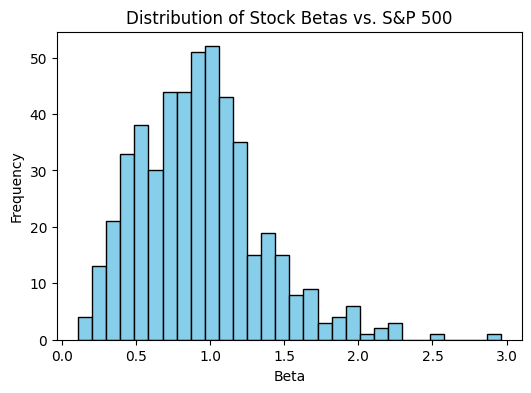

Saved: task2_beta_summary.csv


In [19]:
# --- Cell 5: Plot histogram and save results ---

import matplotlib.pyplot as plt

vals = beta_table["Beta"].dropna().to_numpy()
print("Number of betas plotted:", len(vals))

plt.figure(figsize=(6, 4))
plt.hist(vals, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Stock Betas vs. S&P 500")
plt.xlabel("Beta")
plt.ylabel("Frequency")
plt.show()

# Save results for Task 3
beta_table.to_csv("task2_beta_summary.csv")
print("Saved: task2_beta_summary.csv")


In [20]:
"""
Task 2 Summary
--------------
• Daily returns calculated for all cleaned S&P 500 stocks and the S&P 500 index.
• Beta = corr(stock, market) × (std(stock) / std(market))
• Annual Volatility = std(stock) × √252
• Average Daily Return = mean(stock returns)
• Interpretation:
      Beta < 1  →  defensive, moves less than market
      Beta ≈ 1  →  neutral, moves with market
      Beta > 1  →  aggressive, moves more than market
Results stored in task2_beta_summary.csv for Task 3 (clustering).
"""



'\nTask 2 Summary\n--------------\n• Daily returns calculated for all cleaned S&P 500 stocks and the S&P 500 index.\n• Beta = corr(stock, market) × (std(stock) / std(market))\n• Annual Volatility = std(stock) × √252\n• Average Daily Return = mean(stock returns)\n• Interpretation:\n      Beta < 1  →  defensive, moves less than market\n      Beta ≈ 1  →  neutral, moves with market\n      Beta > 1  →  aggressive, moves more than market\nResults stored in task2_beta_summary.csv for Task 3 (clustering).\n'

In [21]:
 #task3, cell 1
 !pip -q install scikit-learn scipy


In [22]:
# task 3, cell 2 imports & data

import pandas as pd
import numpy as np

# load from Task 2 if needed
try:
    beta_table
except NameError:
    beta_table = pd.read_csv("task2_beta_summary.csv", index_col=0)

# keep only numeric columns we need
features = beta_table[["Beta", "Annual_Volatility"]].dropna().copy()
print("rows in features:", len(features))
features.head()


rows in features: 495


,Beta,Annual_Volatility
Stock,,
A,1.024800,0.296259
AAPL,1.210688,0.270935
ABBV,0.299098,0.219958
ABNB,1.666256,0.467875
ABT,0.672317,0.217839


In [23]:
# Cell 3 — Agglomerative (hierarchical) on Beta only
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 3.1 standardize the single Beta column
X_beta = features[["Beta"]].values
Xb = StandardScaler().fit_transform(X_beta)

# 3.2 try a few K values and pick the best silhouette
best_sil, best_k, best_labels = -1, None, None
for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = model.fit_predict(Xb)
    sil = silhouette_score(Xb, labels)
    if sil > best_sil:
        best_sil, best_k, best_labels = sil, k, labels

features["Agglo_Cluster_Beta"] = best_labels
print(f"Agglomerative (Beta only): K={best_k}, silhouette={best_sil:.3f}")
features.head()


Agglomerative (Beta only): K=3, silhouette=0.533


,Beta,Annual_Volatility,Agglo_Cluster_Beta
Stock,,,
A,1.024800,0.296259,2
AAPL,1.210688,0.270935,2
ABBV,0.299098,0.219958,0
ABNB,1.666256,0.467875,1
ABT,0.672317,0.217839,0


In [24]:
# Cell 4 — K-Means on Beta + Volatility
from sklearn.cluster import KMeans

# 4.1 standardize beta + volatility
X = features[["Beta", "Annual_Volatility"]].values
Xs = StandardScaler().fit_transform(X)

# 4.2 choose K by silhouette
best_sil, best_k, best_labels = -1, None, None
for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(Xs)
    sil = silhouette_score(Xs, labels)
    if sil > best_sil:
        best_sil, best_k, best_labels = sil, k, labels
        best_centers = km.cluster_centers_

features["KMeans_Cluster"] = best_labels
print(f"KMeans (Beta+Vol): K={best_k}, silhouette={best_sil:.3f}")


KMeans (Beta+Vol): K=2, silhouette=0.546


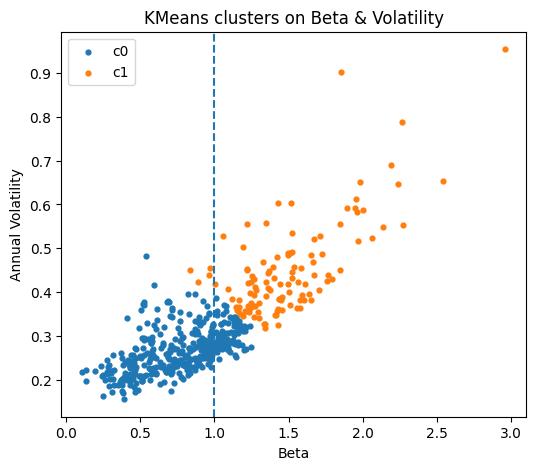

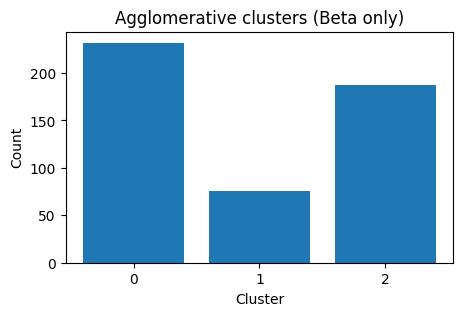

In [25]:
# cell 5, quick visuals

import matplotlib.pyplot as plt

# 5.1 scatter: Beta vs Volatility, coloured by KMeans cluster
plt.figure(figsize=(6,5))
for g in sorted(features["KMeans_Cluster"].unique()):
    sub = features[features["KMeans_Cluster"] == g]
    plt.scatter(sub["Beta"], sub["Annual_Volatility"], s=12, label=f"c{g}")
plt.axvline(1.0, linestyle="--")  # market beta reference
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("KMeans clusters on Beta & Volatility")
plt.legend()
plt.show()

# 5.2 (optional) simple count bars for Agglomerative
counts = features["Agglo_Cluster_Beta"].value_counts().sort_index()
plt.figure(figsize=(5,3))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Agglomerative clusters (Beta only)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


In [26]:
# cell 6, cluster profiles

# profiles for agglomerative (beta-only)
profile_aggl = (features
                .groupby("Agglo_Cluster_Beta")
                .agg(n=("Beta","size"),
                     beta_mean=("Beta","mean"),
                     beta_std=("Beta","std")))
print("Agglomerative (Beta-only) profile:")
display(profile_aggl)

# profiles for kmeans (beta + vol)
profile_km = (features
              .groupby("KMeans_Cluster")
              .agg(n=("Beta","size"),
                   beta_mean=("Beta","mean"),
                   vol_mean=("Annual_Volatility","mean"),
                   ret_mean=("Annual_Volatility","size")))  # placeholder just to show shape
# replace ret_mean with Avg_Daily_Return if you join it from beta_table:
# profile_km = features.join(beta_table["Average_Daily_Return"]).groupby("KMeans_Cluster").agg(...)

print("KMeans (Beta+Vol) profile:")
display(profile_km)


Agglomerative (Beta-only) profile:


,n,beta_mean,beta_std
Agglo_Cluster_Beta,,,
0,232,0.594141,0.184015
1,76,1.650072,0.309654
2,187,1.060917,0.115941


KMeans (Beta+Vol) profile:


,n,beta_mean,vol_mean,ret_mean
KMeans_Cluster,,,,
0,379,0.762364,0.267825,379
1,116,1.488808,0.449854,116


In [27]:
# cell  7, output of the report

# merge labels back to full table (including Avg_Daily_Return if present)
out = beta_table.join(features[["Agglo_Cluster_Beta", "KMeans_Cluster"]])
out.to_csv("task3_clusters_with_metrics.csv")
profile_aggl.to_csv("task3_profile_agglomerative.csv")
profile_km.to_csv("task3_profile_kmeans.csv")

print("Saved:")
print("- task3_clusters_with_metrics.csv")
print("- task3_profile_agglomerative.csv")
print("- task3_profile_kmeans.csv")


Saved:
- task3_clusters_with_metrics.csv
- task3_profile_agglomerative.csv
- task3_profile_kmeans.csv


In [28]:
# brief discussionnotes
"""
Interpretation cheat-sheet
--------------------------
Agglomerative (Beta only):
• Low-beta clusters (< 1) → defensive stocks; lower sensitivity to market moves.
• ~1 beta cluster        → market-like risk; good baseline exposure.
• High-beta clusters (>1) → cyclical/aggressive; larger upside and downside.

KMeans (Beta + Volatility):
• Adding volatility separates stocks with similar beta but different total risk.
• Use cluster profiles to label groups (e.g., "low-beta/low-vol" vs "high-beta/high-vol").
• Silhouette score was used to pick K; report the chosen K and the score.

Caveats:
• Betas can shift across regimes; results depend on 2022–2025 window.
• Sector composition can influence clusters; optional: add sector and re-profile.
"""


'\nInterpretation cheat-sheet\n--------------------------\nAgglomerative (Beta only):\n• Low-beta clusters (< 1) → defensive stocks; lower sensitivity to market moves.\n• ~1 beta cluster        → market-like risk; good baseline exposure.\n• High-beta clusters (>1) → cyclical/aggressive; larger upside and downside.\n\nKMeans (Beta + Volatility):\n• Adding volatility separates stocks with similar beta but different total risk.\n• Use cluster profiles to label groups (e.g., "low-beta/low-vol" vs "high-beta/high-vol").\n• Silhouette score was used to pick K; report the chosen K and the score.\n\nCaveats:\n• Betas can shift across regimes; results depend on 2022–2025 window.\n• Sector composition can influence clusters; optional: add sector and re-profile.\n'

In [29]:
# Task4 cell1

# --- Task 4: K-Means Clustering on risk/return features ---

import pandas as pd
import numpy as np

# load Task 2 metrics
try:
    beta_table
except NameError:
    beta_table = pd.read_csv("task2_beta_summary.csv", index_col=0)

# pick features (you can add/remove columns if needed)
features = beta_table[["Beta", "Annual_Volatility", "Average_Daily_Return"]].dropna().copy()
print("rows in features:", len(features))
features.head()


rows in features: 495


,Beta,Annual_Volatility,Average_Daily_Return
Stock,,,
A,1.024800,0.296259,-0.000002
AAPL,1.210688,0.270935,0.000591
ABBV,0.299098,0.219958,0.000610
ABNB,1.666256,0.467875,0.000074
ABT,0.672317,0.217839,-0.000106


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features.values)  # Z-scores of [Beta, Vol, AvgRet]

print("X shape:", X.shape)


X shape: (495, 3)


In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best = {"k": None, "score": -1, "labels": None, "centers": None}

for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    if sil > best["score"]:
        best = {"k": k, "score": sil, "labels": labels, "centers": km.cluster_centers_}

print(f"Chosen K = {best['k']}  (silhouette = {best['score']:.3f})")
features["KMeans_Cluster"] = best["labels"]


Chosen K = 2  (silhouette = 0.449)


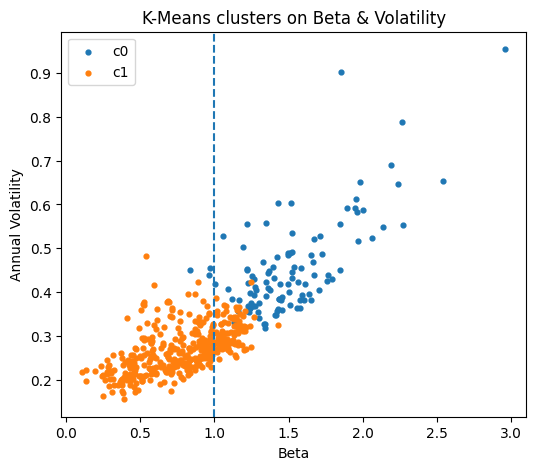

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
for g in sorted(features["KMeans_Cluster"].unique()):
    sub = features[features["KMeans_Cluster"] == g]
    plt.scatter(sub["Beta"], sub["Annual_Volatility"], s=12, label=f"c{g}")
plt.axvline(1.0, linestyle="--")  # market beta reference
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("K-Means clusters on Beta & Volatility")
plt.legend()
plt.show()


In [33]:
# cell 5

profile = (features
           .groupby("KMeans_Cluster")
           .agg(n=("Beta","size"),
                beta_mean=("Beta","mean"),
                vol_mean=("Annual_Volatility","mean"),
                ret_mean=("Average_Daily_Return","mean"))
           .sort_index())
print("K-Means cluster profile:")
profile


K-Means cluster profile:


,n,beta_mean,vol_mean,ret_mean
KMeans_Cluster,,,,
0,107,1.513658,0.456591,0.000662
1,388,0.772361,0.270189,0.000335


In [34]:
#cell 6
# join labels back to the full metrics for easy export/use later
kmeans_result = beta_table.join(features["KMeans_Cluster"], how="inner")
kmeans_result.to_csv("task4_kmeans_clusters.csv")
profile.to_csv("task4_kmeans_profile.csv")

print("Saved:")
print("- task4_kmeans_clusters.csv")
print("- task4_kmeans_profile.csv")


Saved:
- task4_kmeans_clusters.csv
- task4_kmeans_profile.csv


In [35]:
"""
Task 4 (K-Means) notes
----------------------
• Features used: Beta, Annual Volatility, Average Daily Return (standardized).
• K chosen by highest silhouette score over K=2..9.
• Scatter plot shows separation on (Beta, Volatility).
• Profile table summarizes each cluster's typical risk/return:
    - lower beta & lower vol  → defensive group
    - beta ~ 1, mid vol       → market-like
    - higher beta & higher vol→ aggressive/cyclical
• Files saved: task4_kmeans_clusters.csv, task4_kmeans_profile.csv
"""


"\nTask 4 (K-Means) notes\n----------------------\n• Features used: Beta, Annual Volatility, Average Daily Return (standardized).\n• K chosen by highest silhouette score over K=2..9.\n• Scatter plot shows separation on (Beta, Volatility).\n• Profile table summarizes each cluster's typical risk/return:\n    - lower beta & lower vol  → defensive group\n    - beta ~ 1, mid vol       → market-like\n    - higher beta & higher vol→ aggressive/cyclical\n• Files saved: task4_kmeans_clusters.csv, task4_kmeans_profile.csv\n"